# Table of Contents
- [Imports](#Imports)
- [Set Up](#Set-Up)
- [Data Loaders](#Data-Loaders)
- [Model Training](#Model-Training)
- [Evaluation](#Evaluation)
- [Evaluation Insights](#Evaluation-Insights)
- [Interpretation using LIME](#Interpretation-using-LIME)
- [LIME visualizations for three random samples](#LIME-visualizations-for-three-random-samples)
- [Best/Worst Performing Samples](#Best/Worst-Performing-Samples)
- [Best/Worst Performing Insights](#Best-Performing-Samples)
- [Performance Per Gender](#Performance-Per-Gender)
- [Performance Per Age Group](#Performance-Per-Age-Group)
- [Performance Per Gender/Age Group Insights](#Model-Performance-by-Gender)

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

from trainer import train_model
from evaluator import evaluate_model, load_model_from_checkpoint
from evaluator import evaluate_samples, get_best_and_worst_samples, load_model_from_checkpoint
from interpret import interpret_sample, ModelWrapper
from base_model import MultiTaskResNet
from utils_data_loader import get_custom_data_loaders_v3
from evaluation import generate_classification_report, perform_threshold_analysis, plot_confusion_matrix

# Set Up

In [2]:
CHECKPOINT_DIR = "checkpoints"
RESULTS_FILE = "metrics.csv"
EVALUATION_FILE = "evaluation_metrics.csv"

BATCH_SIZE = 32
MAX_EPOCHS = 10
LEARNING_RATE = 0.0001 
VERSION = 'v3'

# Data Loaders

In [3]:
train_loader, val_loader, test_loader = get_custom_data_loaders_v3(batch_size=BATCH_SIZE)

[DEBUG] Loaded 14164 images from data/train
[DEBUG] Loaded 4722 images from data/validation
[DEBUG] Loaded 4722 images from data/test


# Model Training

In [5]:
print(f"--- Training Model Version: {VERSION} ---")
model = MultiTaskResNet(learning_rate=LEARNING_RATE)
train_model(model, train_loader, val_loader, test_loader, VERSION, max_epochs=MAX_EPOCHS, checkpoint_dir=CHECKPOINT_DIR)
# 52m 50.3s

--- Training Model Version: v3 ---


c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:652: Checkpoint directory C:\Users\Liberty\Desktop\CodingProjects\deep learning - sprint 3\modeling\checkpoints exists and is not empty.

  | Name  | Type         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Val Gender Accuracy: 0.2500
Val Age MAE: 22.9890
Val Gender Accuracy: 0.5312
Val Age MAE: 13.1288


c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Train Gender Accuracy: 0.4688
Train Age MAE: 38.6739
Train Gender Accuracy: 0.6875
Train Age MAE: 33.6307
Train Gender Accuracy: 0.5938
Train Age MAE: 33.9211
Train Gender Accuracy: 0.6250
Train Age MAE: 33.8013
Train Gender Accuracy: 0.4062
Train Age MAE: 30.7170
Train Gender Accuracy: 0.6250
Train Age MAE: 29.7136
Train Gender Accuracy: 0.5938
Train Age MAE: 31.5068
Train Gender Accuracy: 0.4375
Train Age MAE: 28.4606
Train Gender Accuracy: 0.5000
Train Age MAE: 33.9829
Train Gender Accuracy: 0.5312
Train Age MAE: 31.1303
Train Gender Accuracy: 0.6875
Train Age MAE: 32.3026
Train Gender Accuracy: 0.5000
Train Age MAE: 29.0911
Train Gender Accuracy: 0.5312
Train Age MAE: 28.8780
Train Gender Accuracy: 0.6562
Train Age MAE: 30.5312
Train Gender Accuracy: 0.5938
Train Age MAE: 31.0788
Train Gender Accuracy: 0.7500
Train Age MAE: 36.9939
Train Gender Accuracy: 0.6250
Train Age MAE: 25.5003
Train Gender Accuracy: 0.7812
Train Age MAE: 30.9620
Train Gender Accuracy: 0.5625
Train Age MAE: 2

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.2812
Val Age MAE: 5.0355
Val Gender Accuracy: 0.5625
Val Age MAE: 4.7450
Val Gender Accuracy: 0.7500
Val Age MAE: 5.4232
Val Gender Accuracy: 0.7500
Val Age MAE: 5.9592
Val Gender Accuracy: 0.8438
Val Age MAE: 4.7829
Val Gender Accuracy: 0.1562
Val Age MAE: 2.5528
Val Gender Accuracy: 0.0938
Val Age MAE: 3.1595
Val Gender Accuracy: 0.0938
Val Age MAE: 2.2179
Val Gender Accuracy: 0.5938
Val Age MAE: 4.5824
Val Gender Accuracy: 0.9062
Val Age MAE: 3.9154
Val Gender Accuracy: 0.9375
Val Age MAE: 3.9462
Val Gender Accuracy: 0.9062
Val Age MAE: 3.7909
Val Gender Accuracy: 0.9375
Val Age MAE: 3.5694
Val Gender Accuracy: 0.8750
Val Age MAE: 3.4055
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3912
Val Gender Accuracy: 0.9062
Val Age MAE: 3.0214
Val Gender Accuracy: 1.0000
Val Age MAE: 2.3769
Val Gender Accuracy: 0.9688
Val Age MAE: 3.0067
Val Gender Accuracy: 0.7812
Val Age MAE: 4.3143
Val Gender Accuracy: 0.9062
Val Age MAE: 2.8400
Val Gender Accuracy: 0.9375
Val Age MAE:

Metric val_loss improved. New best score: 60.151
Epoch 0, global step 443: 'val_loss' reached 60.15065 (best 60.15065), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Val Gender Accuracy: 0.8125
Val Age MAE: 5.4192
Val Gender Accuracy: 0.7778
Val Age MAE: 8.9031
Train Gender Accuracy: 0.7812
Train Age MAE: 6.3136
Train Gender Accuracy: 0.6250
Train Age MAE: 6.0366
Train Gender Accuracy: 0.6875
Train Age MAE: 6.3673
Train Gender Accuracy: 0.5938
Train Age MAE: 6.6369
Train Gender Accuracy: 0.6250
Train Age MAE: 3.1044
Train Gender Accuracy: 0.6562
Train Age MAE: 7.0107
Train Gender Accuracy: 0.6250
Train Age MAE: 7.4878
Train Gender Accuracy: 0.8438
Train Age MAE: 6.8991
Train Gender Accuracy: 0.7812
Train Age MAE: 6.0222
Train Gender Accuracy: 0.8125
Train Age MAE: 6.9432
Train Gender Accuracy: 0.4375
Train Age MAE: 4.1568
Train Gender Accuracy: 0.7812
Train Age MAE: 4.8173
Train Gender Accuracy: 0.6875
Train Age MAE: 8.8637
Train Gender Accuracy: 0.6562
Train Age MAE: 5.6472
Train Gender Accuracy: 0.6562
Train Age MAE: 5.6850
Train Gender Accuracy: 0.7188
Train Age MAE: 8.8075
Train Gender Accuracy: 0.5000
Train Age MAE: 5.4341
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.6875
Val Age MAE: 4.8044
Val Gender Accuracy: 0.7812
Val Age MAE: 4.7606
Val Gender Accuracy: 0.8438
Val Age MAE: 4.8914
Val Gender Accuracy: 0.8125
Val Age MAE: 4.4746
Val Gender Accuracy: 0.8438
Val Age MAE: 4.3766
Val Gender Accuracy: 0.2188
Val Age MAE: 1.6282
Val Gender Accuracy: 0.1562
Val Age MAE: 1.2439
Val Gender Accuracy: 0.3125
Val Age MAE: 0.9473
Val Gender Accuracy: 0.5625
Val Age MAE: 2.9383
Val Gender Accuracy: 0.8438
Val Age MAE: 4.0796
Val Gender Accuracy: 0.9062
Val Age MAE: 3.0657
Val Gender Accuracy: 0.9062
Val Age MAE: 3.1902
Val Gender Accuracy: 0.8750
Val Age MAE: 3.1860
Val Gender Accuracy: 0.8438
Val Age MAE: 3.2101
Val Gender Accuracy: 0.9375
Val Age MAE: 2.6519
Val Gender Accuracy: 0.9062
Val Age MAE: 2.7269
Val Gender Accuracy: 0.9062
Val Age MAE: 2.5419
Val Gender Accuracy: 0.8750
Val Age MAE: 2.5837
Val Gender Accuracy: 0.7500
Val Age MAE: 3.7529
Val Gender Accuracy: 0.9375
Val Age MAE: 2.7106
Val Gender Accuracy: 0.9375
Val Age MAE:

Metric val_loss improved by 2.385 >= min_delta = 0.0. New best score: 57.766
Epoch 1, global step 886: 'val_loss' reached 57.76600 (best 57.76600), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Train Gender Accuracy: 0.6562
Train Age MAE: 4.2213
Train Gender Accuracy: 0.7188
Train Age MAE: 6.5032
Train Gender Accuracy: 0.7500
Train Age MAE: 5.4460
Train Gender Accuracy: 0.7812
Train Age MAE: 5.9982
Train Gender Accuracy: 0.5938
Train Age MAE: 4.4642
Train Gender Accuracy: 0.7500
Train Age MAE: 3.5875
Train Gender Accuracy: 0.8125
Train Age MAE: 5.7110
Train Gender Accuracy: 0.6562
Train Age MAE: 4.8343
Train Gender Accuracy: 0.6875
Train Age MAE: 5.9724
Train Gender Accuracy: 0.8125
Train Age MAE: 4.5314
Train Gender Accuracy: 0.9375
Train Age MAE: 6.0931
Train Gender Accuracy: 0.8750
Train Age MAE: 4.4964
Train Gender Accuracy: 0.7812
Train Age MAE: 4.1566
Train Gender Accuracy: 0.6875
Train Age MAE: 7.2069
Train Gender Accuracy: 0.7812
Train Age MAE: 5.0320
Train Gender Accuracy: 0.8438
Train Age MAE: 4.2101
Train Gender Accuracy: 0.6562
Train Age MAE: 4.7153
Train Gender Accuracy: 0.7500
Train Age MAE: 4.1644
Train Gender Accuracy: 0.7500
Train Age MAE: 4.2742
Train Gender

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 6.9589
Val Gender Accuracy: 0.9062
Val Age MAE: 5.5314
Val Gender Accuracy: 0.9375
Val Age MAE: 6.2065
Val Gender Accuracy: 0.9375
Val Age MAE: 7.5318
Val Gender Accuracy: 0.8750
Val Age MAE: 5.9522
Val Gender Accuracy: 0.3438
Val Age MAE: 3.3449
Val Gender Accuracy: 0.1250
Val Age MAE: 2.4878
Val Gender Accuracy: 0.3750
Val Age MAE: 1.7156
Val Gender Accuracy: 0.6562
Val Age MAE: 6.2506
Val Gender Accuracy: 0.8750
Val Age MAE: 6.3333
Val Gender Accuracy: 0.9688
Val Age MAE: 5.8608
Val Gender Accuracy: 0.9062
Val Age MAE: 5.9299
Val Gender Accuracy: 0.9688
Val Age MAE: 5.6161
Val Gender Accuracy: 0.9375
Val Age MAE: 5.1169
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7981
Val Gender Accuracy: 0.8750
Val Age MAE: 3.8549
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7013
Val Gender Accuracy: 0.9688
Val Age MAE: 4.5538
Val Gender Accuracy: 0.7500
Val Age MAE: 4.0781
Val Gender Accuracy: 1.0000
Val Age MAE: 3.7864
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 0.420 >= min_delta = 0.0. New best score: 57.346
Epoch 2, global step 1329: 'val_loss' reached 57.34581 (best 57.34581), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Train Gender Accuracy: 0.8125
Train Age MAE: 3.1419
Train Gender Accuracy: 0.7812
Train Age MAE: 6.1368
Train Gender Accuracy: 0.7812
Train Age MAE: 3.6649
Train Gender Accuracy: 0.6875
Train Age MAE: 3.6845
Train Gender Accuracy: 0.7812
Train Age MAE: 4.4771
Train Gender Accuracy: 0.6875
Train Age MAE: 3.8296
Train Gender Accuracy: 0.8438
Train Age MAE: 3.6161
Train Gender Accuracy: 0.8438
Train Age MAE: 3.8707
Train Gender Accuracy: 0.7500
Train Age MAE: 3.7079
Train Gender Accuracy: 0.9062
Train Age MAE: 2.9819
Train Gender Accuracy: 0.8438
Train Age MAE: 2.8755
Train Gender Accuracy: 0.8125
Train Age MAE: 3.7668
Train Gender Accuracy: 0.8750
Train Age MAE: 4.0526
Train Gender Accuracy: 0.8125
Train Age MAE: 3.8027
Train Gender Accuracy: 0.8438
Train Age MAE: 4.5021
Train Gender Accuracy: 0.7500
Train Age MAE: 3.2836
Train Gender Accuracy: 0.7188
Train Age MAE: 3.6169
Train Gender Accuracy: 0.8438
Train Age MAE: 3.2691
Train Gender Accuracy: 0.8438
Train Age MAE: 3.6036
Train Gender

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 4.4101
Val Gender Accuracy: 0.8750
Val Age MAE: 4.0134
Val Gender Accuracy: 0.9375
Val Age MAE: 4.3926
Val Gender Accuracy: 0.9062
Val Age MAE: 4.2885
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1984
Val Gender Accuracy: 0.2188
Val Age MAE: 1.5722
Val Gender Accuracy: 0.1250
Val Age MAE: 0.8936
Val Gender Accuracy: 0.0000
Val Age MAE: 0.4659
Val Gender Accuracy: 0.6250
Val Age MAE: 2.5924
Val Gender Accuracy: 0.9375
Val Age MAE: 3.0548
Val Gender Accuracy: 0.9062
Val Age MAE: 3.1966
Val Gender Accuracy: 0.9062
Val Age MAE: 3.6333
Val Gender Accuracy: 0.9688
Val Age MAE: 2.7572
Val Gender Accuracy: 0.9375
Val Age MAE: 3.3777
Val Gender Accuracy: 0.9688
Val Age MAE: 2.4932
Val Gender Accuracy: 0.8750
Val Age MAE: 2.7548
Val Gender Accuracy: 1.0000
Val Age MAE: 2.6275
Val Gender Accuracy: 0.9688
Val Age MAE: 3.2256
Val Gender Accuracy: 0.7500
Val Age MAE: 3.2729
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3501
Val Gender Accuracy: 0.9688
Val Age MAE:

Epoch 3, global step 1772: 'val_loss' was not in top 1


Val Gender Accuracy: 0.3438
Val Age MAE: 5.8241
Val Gender Accuracy: 0.6111
Val Age MAE: 6.3651
Train Gender Accuracy: 0.9375
Train Age MAE: 2.0592
Train Gender Accuracy: 0.9062
Train Age MAE: 4.6051
Train Gender Accuracy: 0.8750
Train Age MAE: 4.5204
Train Gender Accuracy: 0.8438
Train Age MAE: 3.4460
Train Gender Accuracy: 0.9375
Train Age MAE: 3.0123
Train Gender Accuracy: 0.7500
Train Age MAE: 3.7212
Train Gender Accuracy: 0.9062
Train Age MAE: 2.9145
Train Gender Accuracy: 0.8438
Train Age MAE: 4.7170
Train Gender Accuracy: 0.8125
Train Age MAE: 2.9332
Train Gender Accuracy: 0.8438
Train Age MAE: 2.8380
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7114
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9648
Train Gender Accuracy: 0.6875
Train Age MAE: 2.9402
Train Gender Accuracy: 0.8125
Train Age MAE: 2.7093
Train Gender Accuracy: 0.8438
Train Age MAE: 2.7926
Train Gender Accuracy: 0.8125
Train Age MAE: 4.3833
Train Gender Accuracy: 0.8125
Train Age MAE: 2.2956
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9062
Val Age MAE: 5.0744
Val Gender Accuracy: 0.9375
Val Age MAE: 3.5548
Val Gender Accuracy: 0.9375
Val Age MAE: 4.2241
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6287
Val Gender Accuracy: 0.9375
Val Age MAE: 4.4696
Val Gender Accuracy: 0.5000
Val Age MAE: 1.8578
Val Gender Accuracy: 0.5625
Val Age MAE: 1.1842
Val Gender Accuracy: 0.5312
Val Age MAE: 0.6294
Val Gender Accuracy: 0.7500
Val Age MAE: 2.8468
Val Gender Accuracy: 0.9375
Val Age MAE: 4.0405
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6866
Val Gender Accuracy: 0.9375
Val Age MAE: 3.6547
Val Gender Accuracy: 0.9688
Val Age MAE: 3.4139
Val Gender Accuracy: 0.9688
Val Age MAE: 2.9419
Val Gender Accuracy: 0.9688
Val Age MAE: 2.5920
Val Gender Accuracy: 0.9062
Val Age MAE: 2.8763
Val Gender Accuracy: 1.0000
Val Age MAE: 2.4012
Val Gender Accuracy: 1.0000
Val Age MAE: 2.7598
Val Gender Accuracy: 0.8438
Val Age MAE: 3.5060
Val Gender Accuracy: 0.9375
Val Age MAE: 3.1195
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 2.070 >= min_delta = 0.0. New best score: 55.275
Epoch 4, global step 2215: 'val_loss' reached 55.27532 (best 55.27532), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Val Gender Accuracy: 0.3889
Val Age MAE: 7.0142
Train Gender Accuracy: 0.7812
Train Age MAE: 2.4443
Train Gender Accuracy: 0.9375
Train Age MAE: 2.5106
Train Gender Accuracy: 0.8750
Train Age MAE: 3.1888
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5961
Train Gender Accuracy: 0.8438
Train Age MAE: 2.8141
Train Gender Accuracy: 0.9375
Train Age MAE: 3.1316
Train Gender Accuracy: 0.7812
Train Age MAE: 2.4932
Train Gender Accuracy: 0.8125
Train Age MAE: 1.8606
Train Gender Accuracy: 0.8438
Train Age MAE: 3.0647
Train Gender Accuracy: 0.8125
Train Age MAE: 3.7160
Train Gender Accuracy: 0.8750
Train Age MAE: 2.1724
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7914
Train Gender Accuracy: 0.8438
Train Age MAE: 2.7702
Train Gender Accuracy: 0.7188
Train Age MAE: 3.1006
Train Gender Accuracy: 0.7188
Train Age MAE: 2.6064
Train Gender Accuracy: 0.7812
Train Age MAE: 3.0934
Train Gender Accuracy: 0.7500
Train Age MAE: 3.1530
Train Gender Accuracy: 0.9062
Train Age MAE: 2.3011
Train Gender Acc

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 4.5822
Val Gender Accuracy: 0.9062
Val Age MAE: 4.0384
Val Gender Accuracy: 0.8750
Val Age MAE: 4.6178
Val Gender Accuracy: 0.9062
Val Age MAE: 5.3696
Val Gender Accuracy: 0.9375
Val Age MAE: 4.6576
Val Gender Accuracy: 0.4375
Val Age MAE: 1.7039
Val Gender Accuracy: 0.3125
Val Age MAE: 1.6164
Val Gender Accuracy: 0.3125
Val Age MAE: 0.9047
Val Gender Accuracy: 0.6875
Val Age MAE: 3.8199
Val Gender Accuracy: 0.9688
Val Age MAE: 4.0706
Val Gender Accuracy: 0.9688
Val Age MAE: 4.5685
Val Gender Accuracy: 0.9062
Val Age MAE: 5.2061
Val Gender Accuracy: 0.9688
Val Age MAE: 4.0165
Val Gender Accuracy: 0.9688
Val Age MAE: 3.9343
Val Gender Accuracy: 0.9688
Val Age MAE: 3.2127
Val Gender Accuracy: 0.9375
Val Age MAE: 4.0435
Val Gender Accuracy: 1.0000
Val Age MAE: 2.9100
Val Gender Accuracy: 1.0000
Val Age MAE: 2.6067
Val Gender Accuracy: 0.8750
Val Age MAE: 3.8940
Val Gender Accuracy: 0.9375
Val Age MAE: 3.1141
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 3.412 >= min_delta = 0.0. New best score: 51.863
Epoch 5, global step 2658: 'val_loss' reached 51.86320 (best 51.86320), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Train Gender Accuracy: 0.8750
Train Age MAE: 2.3170
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9409
Train Gender Accuracy: 0.8125
Train Age MAE: 1.9948
Train Gender Accuracy: 0.8125
Train Age MAE: 2.1273
Train Gender Accuracy: 0.7812
Train Age MAE: 2.9125
Train Gender Accuracy: 0.7500
Train Age MAE: 3.1498
Train Gender Accuracy: 0.9375
Train Age MAE: 2.7103
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4166
Train Gender Accuracy: 0.7188
Train Age MAE: 2.3283
Train Gender Accuracy: 0.7500
Train Age MAE: 2.8079
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9486
Train Gender Accuracy: 0.8438
Train Age MAE: 4.4633
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4807
Train Gender Accuracy: 0.8750
Train Age MAE: 4.0686
Train Gender Accuracy: 0.7812
Train Age MAE: 2.5047
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7739
Train Gender Accuracy: 0.9688
Train Age MAE: 3.4401
Train Gender Accuracy: 0.8438
Train Age MAE: 2.3121
Train Gender Accuracy: 0.8750
Train Age MAE: 2.3542
Train Gender

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 5.6290
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1422
Val Gender Accuracy: 0.9062
Val Age MAE: 5.2736
Val Gender Accuracy: 0.9062
Val Age MAE: 6.2381
Val Gender Accuracy: 0.9375
Val Age MAE: 5.2589
Val Gender Accuracy: 0.1875
Val Age MAE: 2.4359
Val Gender Accuracy: 0.1562
Val Age MAE: 1.5949
Val Gender Accuracy: 0.1250
Val Age MAE: 0.8400
Val Gender Accuracy: 0.6562
Val Age MAE: 3.9460
Val Gender Accuracy: 0.9375
Val Age MAE: 4.4534
Val Gender Accuracy: 0.9375
Val Age MAE: 5.3515
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7839
Val Gender Accuracy: 1.0000
Val Age MAE: 3.8306
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7332
Val Gender Accuracy: 0.9688
Val Age MAE: 3.0265
Val Gender Accuracy: 0.9062
Val Age MAE: 3.9176
Val Gender Accuracy: 1.0000
Val Age MAE: 2.3770
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1531
Val Gender Accuracy: 0.8438
Val Age MAE: 3.7187
Val Gender Accuracy: 0.9375
Val Age MAE: 3.2116
Val Gender Accuracy: 0.9688
Val Age MAE:

Epoch 6, global step 3101: 'val_loss' was not in top 1


Val Gender Accuracy: 0.6111
Val Age MAE: 8.3266
Train Gender Accuracy: 0.9062
Train Age MAE: 1.8828
Train Gender Accuracy: 0.8125
Train Age MAE: 2.5769
Train Gender Accuracy: 0.9375
Train Age MAE: 2.5370
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4177
Train Gender Accuracy: 0.9062
Train Age MAE: 1.6628
Train Gender Accuracy: 0.9375
Train Age MAE: 2.1569
Train Gender Accuracy: 0.8750
Train Age MAE: 2.6755
Train Gender Accuracy: 0.8438
Train Age MAE: 3.6155
Train Gender Accuracy: 0.8750
Train Age MAE: 2.0361
Train Gender Accuracy: 0.8750
Train Age MAE: 3.0872
Train Gender Accuracy: 0.8125
Train Age MAE: 2.7662
Train Gender Accuracy: 0.8438
Train Age MAE: 2.2331
Train Gender Accuracy: 0.8125
Train Age MAE: 3.1559
Train Gender Accuracy: 0.9062
Train Age MAE: 2.1600
Train Gender Accuracy: 0.9062
Train Age MAE: 2.2187
Train Gender Accuracy: 0.8750
Train Age MAE: 2.5859
Train Gender Accuracy: 0.9062
Train Age MAE: 2.3849
Train Gender Accuracy: 0.9375
Train Age MAE: 2.3391
Train Gender Acc

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9688
Val Age MAE: 4.6628
Val Gender Accuracy: 0.9062
Val Age MAE: 3.6696
Val Gender Accuracy: 0.8750
Val Age MAE: 4.1723
Val Gender Accuracy: 0.9062
Val Age MAE: 4.4291
Val Gender Accuracy: 0.9375
Val Age MAE: 4.9737
Val Gender Accuracy: 0.4062
Val Age MAE: 1.7604
Val Gender Accuracy: 0.4062
Val Age MAE: 1.0711
Val Gender Accuracy: 0.3438
Val Age MAE: 0.5481
Val Gender Accuracy: 0.6875
Val Age MAE: 2.8080
Val Gender Accuracy: 0.9062
Val Age MAE: 3.1764
Val Gender Accuracy: 0.9375
Val Age MAE: 4.3277
Val Gender Accuracy: 0.9062
Val Age MAE: 4.5352
Val Gender Accuracy: 1.0000
Val Age MAE: 3.6247
Val Gender Accuracy: 0.8438
Val Age MAE: 3.8874
Val Gender Accuracy: 0.9375
Val Age MAE: 2.6662
Val Gender Accuracy: 0.8750
Val Age MAE: 3.3522
Val Gender Accuracy: 1.0000
Val Age MAE: 2.2290
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1612
Val Gender Accuracy: 0.7500
Val Age MAE: 3.8648
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3331
Val Gender Accuracy: 0.9375
Val Age MAE:

Epoch 7, global step 3544: 'val_loss' was not in top 1


Val Gender Accuracy: 0.7222
Val Age MAE: 7.0863
Train Gender Accuracy: 0.5938
Train Age MAE: 2.2984
Train Gender Accuracy: 0.9062
Train Age MAE: 4.2713
Train Gender Accuracy: 0.9375
Train Age MAE: 2.7512
Train Gender Accuracy: 1.0000
Train Age MAE: 2.3909
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9086
Train Gender Accuracy: 0.7812
Train Age MAE: 2.5967
Train Gender Accuracy: 0.8125
Train Age MAE: 3.9214
Train Gender Accuracy: 0.8438
Train Age MAE: 1.7622
Train Gender Accuracy: 0.7188
Train Age MAE: 1.8449
Train Gender Accuracy: 0.9062
Train Age MAE: 2.1677
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9564
Train Gender Accuracy: 0.9375
Train Age MAE: 3.0689
Train Gender Accuracy: 0.8438
Train Age MAE: 1.8032
Train Gender Accuracy: 0.9688
Train Age MAE: 3.2788
Train Gender Accuracy: 0.8125
Train Age MAE: 1.7400
Train Gender Accuracy: 0.7500
Train Age MAE: 2.1686
Train Gender Accuracy: 0.8125
Train Age MAE: 1.9366
Train Gender Accuracy: 0.8125
Train Age MAE: 2.1828
Train Gender Acc

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.7812
Val Age MAE: 5.2182
Val Gender Accuracy: 0.7812
Val Age MAE: 3.8307
Val Gender Accuracy: 0.8438
Val Age MAE: 4.8034
Val Gender Accuracy: 0.8750
Val Age MAE: 4.8938
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7004
Val Gender Accuracy: 0.3438
Val Age MAE: 2.0075
Val Gender Accuracy: 0.3438
Val Age MAE: 1.2936
Val Gender Accuracy: 0.2812
Val Age MAE: 0.8428
Val Gender Accuracy: 0.6250
Val Age MAE: 3.5724
Val Gender Accuracy: 0.8750
Val Age MAE: 3.8498
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7501
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6953
Val Gender Accuracy: 0.9375
Val Age MAE: 3.9620
Val Gender Accuracy: 0.9062
Val Age MAE: 3.8310
Val Gender Accuracy: 0.9375
Val Age MAE: 3.0204
Val Gender Accuracy: 0.9375
Val Age MAE: 3.9450
Val Gender Accuracy: 0.9688
Val Age MAE: 2.8647
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1450
Val Gender Accuracy: 0.7812
Val Age MAE: 3.9975
Val Gender Accuracy: 0.8125
Val Age MAE: 2.9204
Val Gender Accuracy: 0.9375
Val Age MAE:

Metric val_loss improved by 0.256 >= min_delta = 0.0. New best score: 51.607
Epoch 8, global step 3987: 'val_loss' reached 51.60726 (best 51.60726), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Val Gender Accuracy: 0.8333
Val Age MAE: 7.3234
Train Gender Accuracy: 0.9375
Train Age MAE: 1.9568
Train Gender Accuracy: 0.7812
Train Age MAE: 1.5824
Train Gender Accuracy: 0.8438
Train Age MAE: 3.1963
Train Gender Accuracy: 0.7812
Train Age MAE: 2.4890
Train Gender Accuracy: 0.8125
Train Age MAE: 2.2154
Train Gender Accuracy: 1.0000
Train Age MAE: 2.5189
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4633
Train Gender Accuracy: 0.9062
Train Age MAE: 1.5581
Train Gender Accuracy: 0.9062
Train Age MAE: 1.4862
Train Gender Accuracy: 0.9062
Train Age MAE: 1.7897
Train Gender Accuracy: 0.8438
Train Age MAE: 2.1266
Train Gender Accuracy: 0.8750
Train Age MAE: 2.2127
Train Gender Accuracy: 0.8750
Train Age MAE: 3.1096
Train Gender Accuracy: 0.9062
Train Age MAE: 2.2824
Train Gender Accuracy: 0.9062
Train Age MAE: 2.7725
Train Gender Accuracy: 0.9062
Train Age MAE: 1.6767
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9804
Train Gender Accuracy: 0.9062
Train Age MAE: 2.1214
Train Gender Acc

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 5.7922
Val Gender Accuracy: 0.8750
Val Age MAE: 3.9698
Val Gender Accuracy: 0.8750
Val Age MAE: 5.2341
Val Gender Accuracy: 0.9375
Val Age MAE: 5.3448
Val Gender Accuracy: 0.9688
Val Age MAE: 5.3898
Val Gender Accuracy: 0.6562
Val Age MAE: 2.0548
Val Gender Accuracy: 0.6562
Val Age MAE: 1.1655
Val Gender Accuracy: 0.5000
Val Age MAE: 0.6597
Val Gender Accuracy: 0.7812
Val Age MAE: 4.0476
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1073
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7961
Val Gender Accuracy: 0.9375
Val Age MAE: 4.8568
Val Gender Accuracy: 0.9375
Val Age MAE: 4.0709
Val Gender Accuracy: 0.8750
Val Age MAE: 3.7087
Val Gender Accuracy: 0.9375
Val Age MAE: 2.8669
Val Gender Accuracy: 0.9375
Val Age MAE: 3.4556
Val Gender Accuracy: 1.0000
Val Age MAE: 2.5712
Val Gender Accuracy: 1.0000
Val Age MAE: 2.9127
Val Gender Accuracy: 0.8125
Val Age MAE: 3.6461
Val Gender Accuracy: 0.8438
Val Age MAE: 3.0402
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 0.819 >= min_delta = 0.0. New best score: 50.789
Epoch 9, global step 4430: 'val_loss' reached 50.78861 (best 50.78861), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v3_best.ckpt' as top 1


Val Gender Accuracy: 0.7812
Val Age MAE: 5.4837
Val Gender Accuracy: 0.7778
Val Age MAE: 7.7616


`Trainer.fit` stopped: `max_epochs=10` reached.


Training complete for version v3. Checkpoint saved to checkpoints


# Evaluation

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
checkpoint_path = "checkpoints/v3_best.ckpt"
model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=5e-5)
model = model.to(device)

generate_classification_report(model, val_loader, dataset_name="Validation")
generate_classification_report(model, test_loader, dataset_name="Test")

Classification Report for Validation Set:
              precision    recall  f1-score   support

        Male       0.87      0.92      0.89      2465
      Female       0.90      0.85      0.88      2257

    accuracy                           0.88      4722
   macro avg       0.89      0.88      0.88      4722
weighted avg       0.89      0.88      0.88      4722

Classification Report for Test Set:
              precision    recall  f1-score   support

        Male       0.88      0.91      0.89      2467
      Female       0.90      0.86      0.88      2255

    accuracy                           0.89      4722
   macro avg       0.89      0.89      0.89      4722
weighted avg       0.89      0.89      0.89      4722



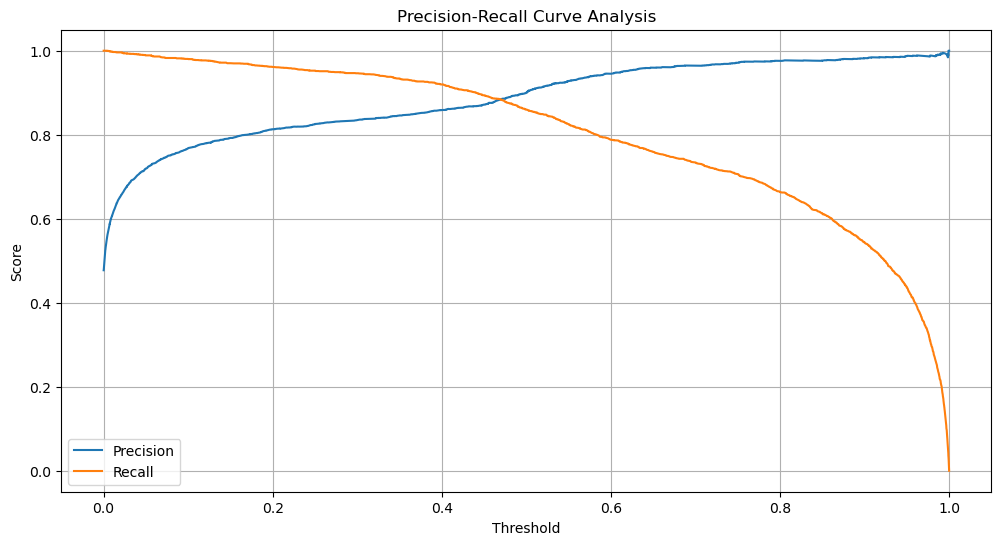

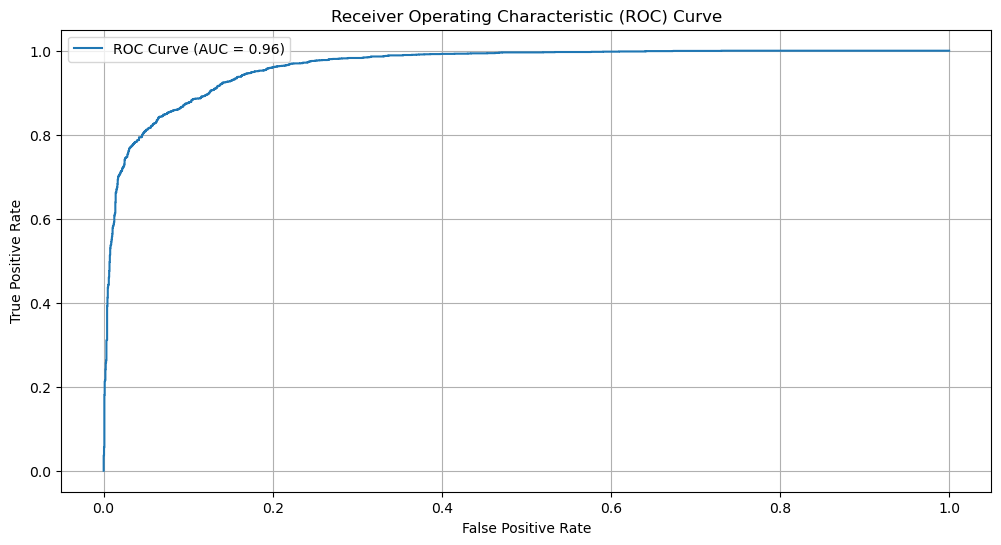

Best Threshold (based on F1 score): 0.39101389050483704


In [6]:
perform_threshold_analysis(model, test_loader)

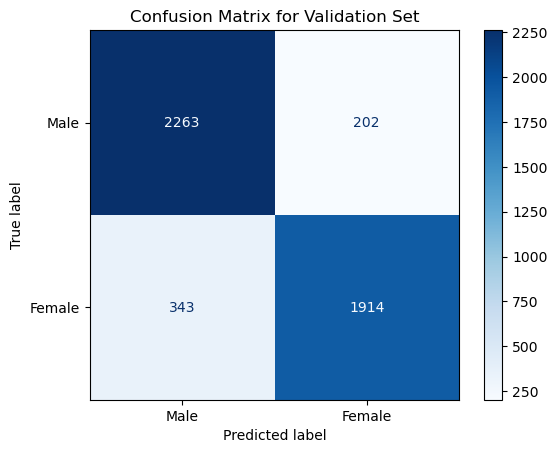

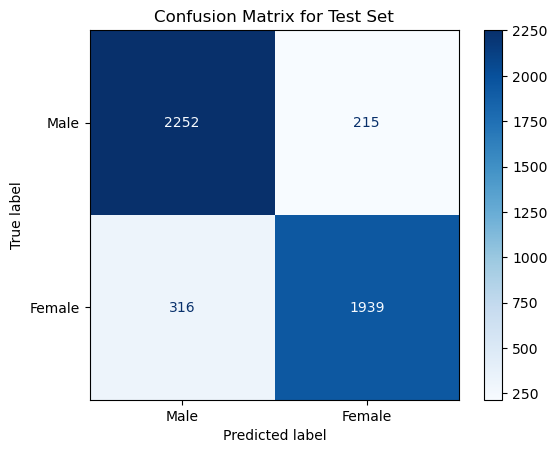

In [7]:
plot_confusion_matrix(model, val_loader, dataset_name="Validation")
plot_confusion_matrix(model, test_loader, dataset_name="Test")

--- Evaluating Model Version: v3 ---
Test Gender Accuracy: 0.8875
Test Age MAE: 5.0543


Version  Test_Gender_Accuracy  Test_Age_MAE
2      v3              0.887548       5.05428

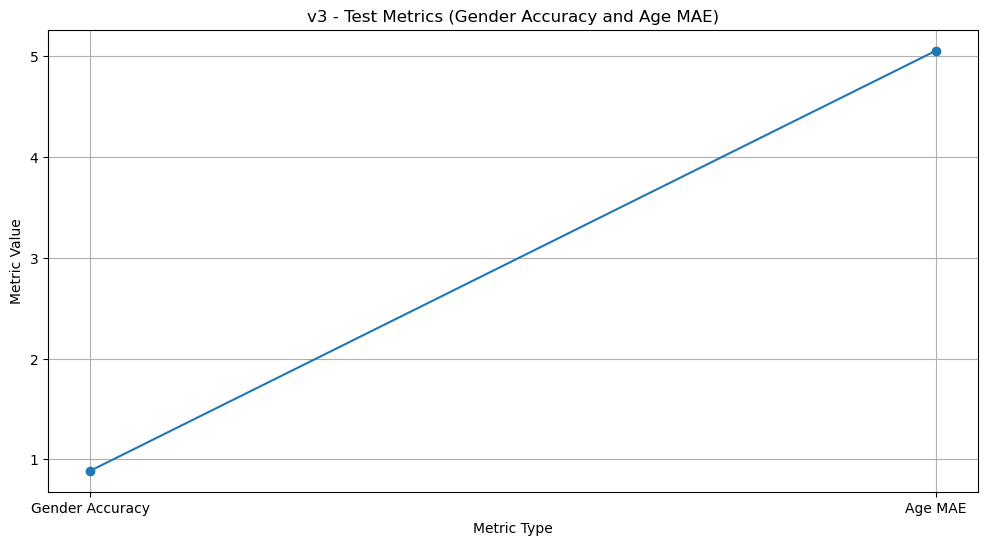

In [10]:
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
    metrics = evaluate_model(model, test_loader)

    if os.path.exists(EVALUATION_FILE):
        evaluation_df = pd.read_csv(EVALUATION_FILE, header=None)
        evaluation_df.columns = ['Version', 'Test_Gender_Accuracy', 'Test_Age_MAE']
        version_eval_metrics = evaluation_df[evaluation_df['Version'] == VERSION]
        display(version_eval_metrics)

        plt.figure(figsize=(12, 6))
        plt.plot(['Gender Accuracy', 'Age MAE'], [version_eval_metrics['Test_Gender_Accuracy'].values[0], version_eval_metrics['Test_Age_MAE'].values[0]], marker='o')
        plt.xlabel('Metric Type')
        plt.ylabel('Metric Value')
        plt.title(f'{VERSION} - Test Metrics (Gender Accuracy and Age MAE)')
        plt.grid(True)
        plt.show()

## Evaluation Insights

> Classification Report

**Validation Set:**
  - For **Male**: Precision is 0.87, Recall is 0.92, and F1-score is 0.89.
  - For **Female**: Precision is 0.90, Recall is 0.85, and F1-score is 0.88.
  - The **accuracy** of the model on the validation set is **0.88**.

There seems to be a slight imbalance, with better recall for males and better precision for females.

**Test Set:**
  - For **Male**: Precision is 0.88, Recall is 0.91, and F1-score is 0.89.
  - For **Female**: Precision is 0.90, Recall is 0.86, and F1-score is 0.88.
  - The **accuracy** of the model on the test set is **0.89**.

Similar trends are observed for the test set as well, with males having a higher recall and females having a higher precision.
____

The precision and recall are fairly stable until the threshold reaches around **0.6**, where recall starts dropping significantly. The AUC is **0.96**, indicating a very good discriminative capability of the model. It suggests that the model can distinguish between different classes effectively.

> Confusion Matrix

- **Validation Set**: The confusion matrix indicates that there are **202** false positives for male and **343** false negatives for female.
- **Test Set**: The confusion matrix indicates **215** false positives for male and **316** false negatives for female.

It suggests that the model is still somewhat biased towards predicting males over females since there are more false negatives for females.

> Overall Gender Accuracy and Age MAE

- The **gender accuracy** for model version v3 is **0.8875**, which is slightly lower compared to previous models.
- The **Age MAE** is **5.0543**, which is similar to the previous models.

The performance for gender classification is good, but there is room for improvement, especially in handling the class imbalance between genders. Compared to the earlier versions, v3 still shows good performance for gender classification but has lower precision for females and lower recall for males.

# Interpretation using LIME

--- Interpreting Model Version: v3 ---
Interpreting model version v3 for gender prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

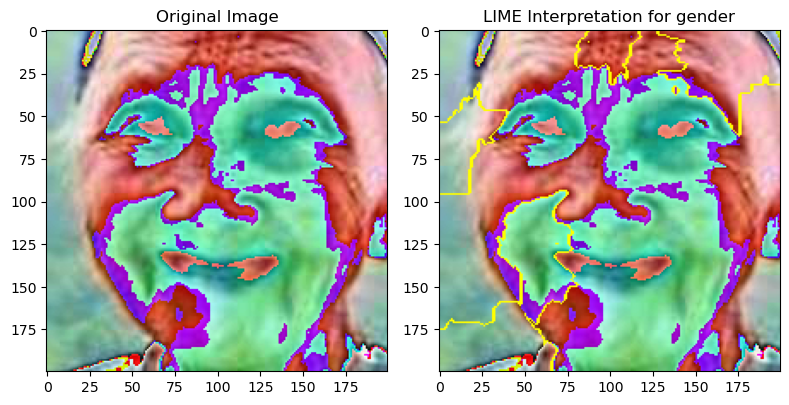

Interpreting model version v3 for age prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

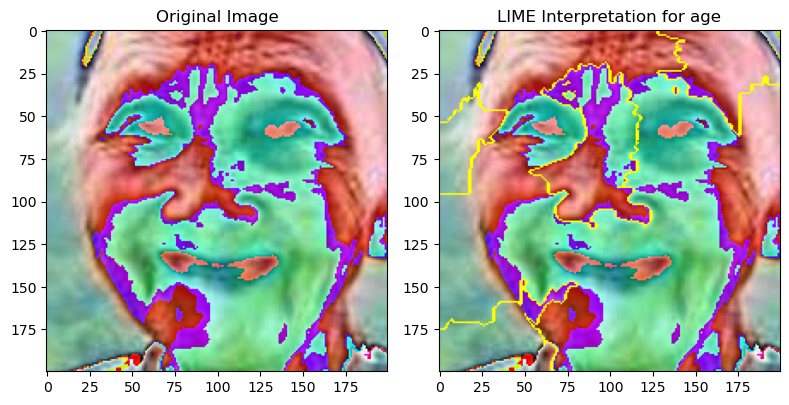

Interpreting model version v3 for gender prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

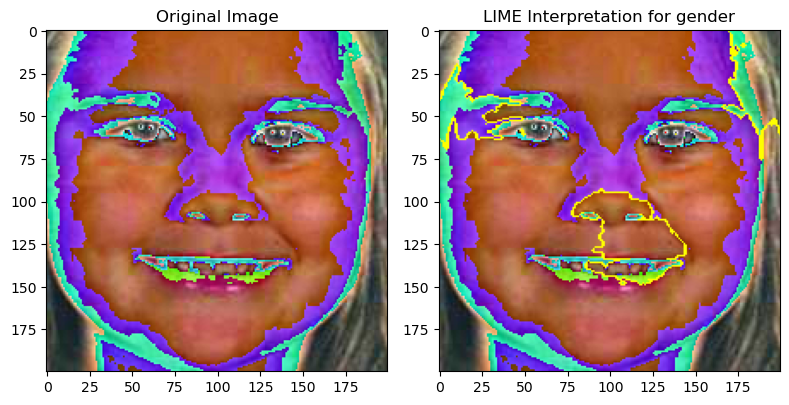

Interpreting model version v3 for age prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

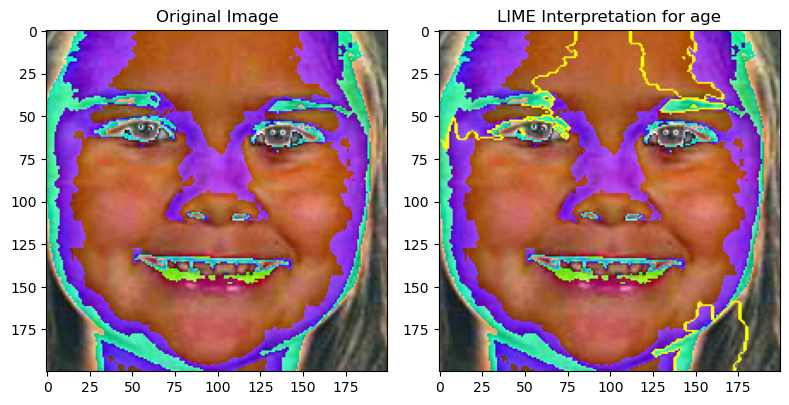

Interpreting model version v3 for gender prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

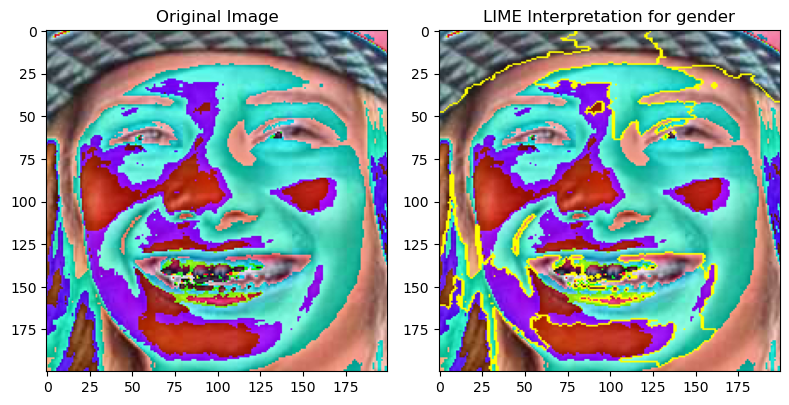

Interpreting model version v3 for age prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

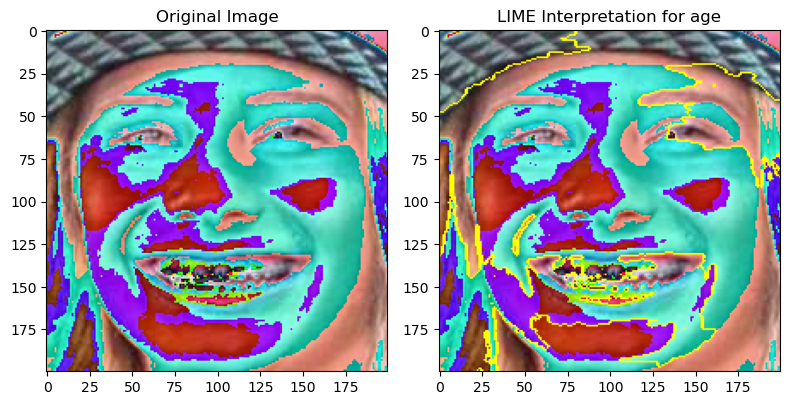

In [11]:
if os.path.exists(checkpoint_path):
    print(f"--- Interpreting Model Version: {VERSION} ---")
    model_wrapper = ModelWrapper(model)
    
    data_iter = iter(test_loader)
    for i in range(3):
        inputs, labels = next(data_iter)
        image_np = inputs[0].permute(1, 2, 0).numpy() * 255 
        label = labels

        print(f"Interpreting model version {VERSION} for gender prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='gender')

        print(f"Interpreting model version {VERSION} for age prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='age')

### LIME visualizations for three random samples

1. **Highlighted Regions for Gender Prediction**:
   - For all three samples, the LIME interpretations for gender prediction seem to consistently highlight regions around the facial features such as the eyes, mouth, and cheekbones.
   - The focus on facial features, such as the eyes and mouth, aligns well with human interpretation for determining gender. This suggests that the model is focusing on relevant regions for making gender-related decisions.

2. **Highlighted Regions for Age Prediction**:
   - The LIME interpretations for age prediction also show emphasis on facial features, particularly wrinkles, cheeks, and the area around the mouth.
   - The model is possibly focusing on the areas that indicate age characteristics like wrinkles or facial contours, which could be beneficial for estimating age. The difference in focus between younger and older individuals also implies that the model tries to capture specific visual clues for age.

3. **Color Distribution**:
   - The LIME explanations often highlight regions that have varied color distributions in the processed images (such as those in green, purple, and red shades). This indicates that the model might be relying on color contrasts and skin textures to make predictions, especially for age.

> Observations for Model v3:

  - Similar to previous versions, the model seems to rely heavily on facial features like the eyes and mouth for both gender and age predictions. This indicates consistency in feature relevance across different versions.
  - Despite the model being generally consistent in focusing on the right regions, it appears that some areas (like the edges of the face or less relevant parts) are still highlighted occasionally. This might indicate some level of noise in the interpretability, suggesting that the model might still consider less relevant features in its decision process.
  - From the images, the distribution of highlighted regions seems quite similar between gender and age predictions. This might mean that there is a feature overlap between the two tasks, which could be affecting the model’s performance when distinguishing more nuanced age differences.
  - The presence of overlapping features for age and gender predictions implies that the model might have difficulty in separating these two tasks fully, leading to errors in scenarios where gender and age features are not distinctly different. 

## Best/Worst Performing Samples

--- Evaluating Model Version: v3 ---
Model loaded successfully.
Interpreting model version v3 for best performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

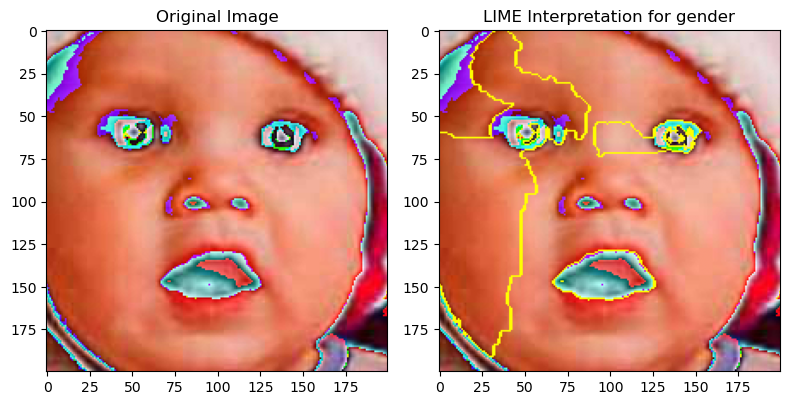

Interpreting model version v3 for best performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

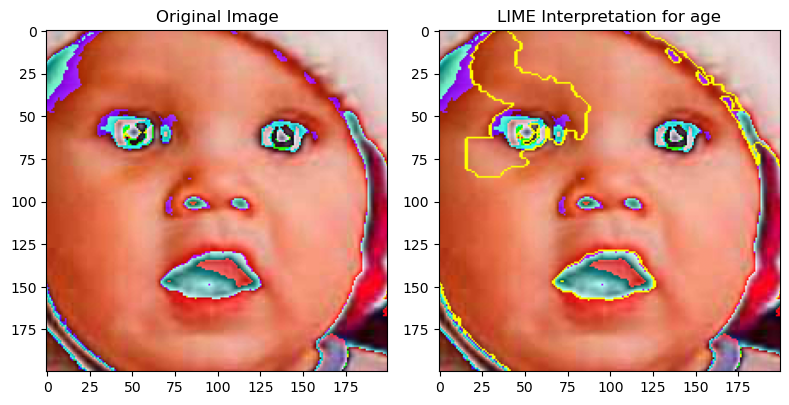

Interpreting model version v3 for best performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

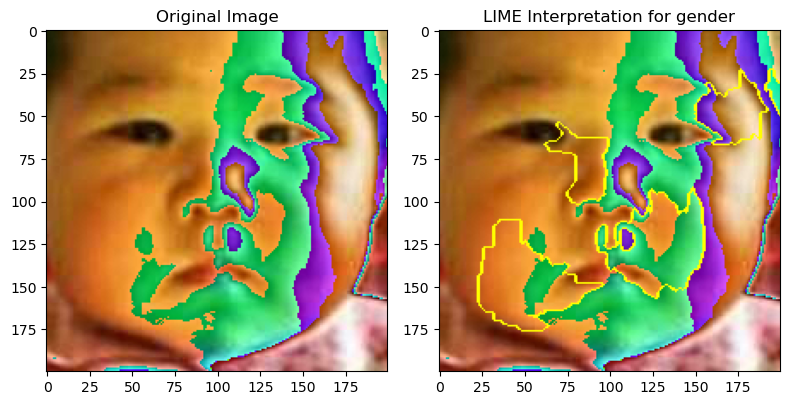

Interpreting model version v3 for best performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

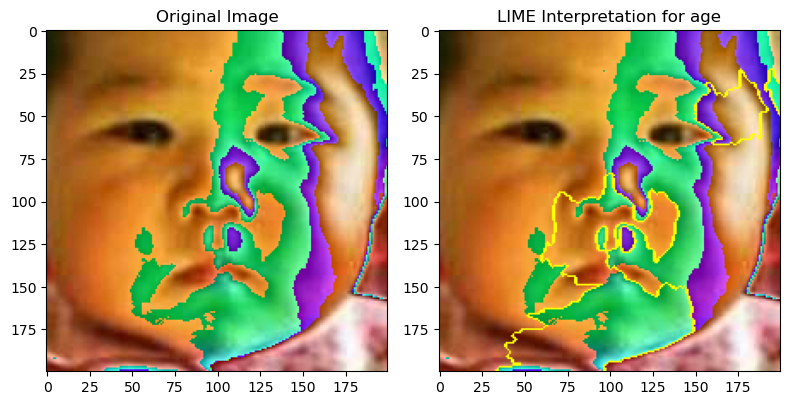

Interpreting model version v3 for best performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

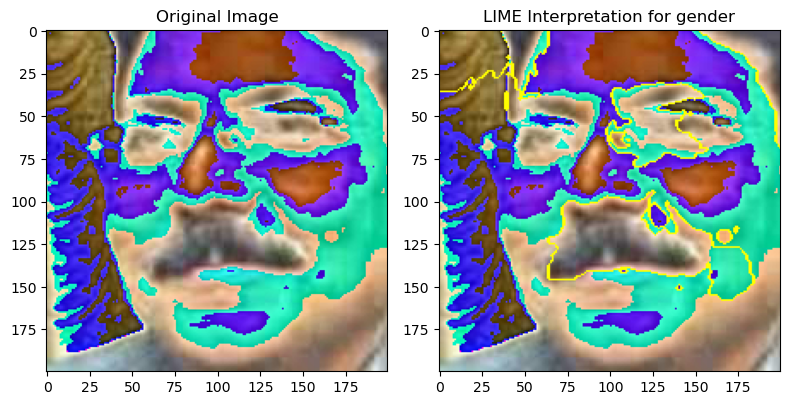

Interpreting model version v3 for best performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

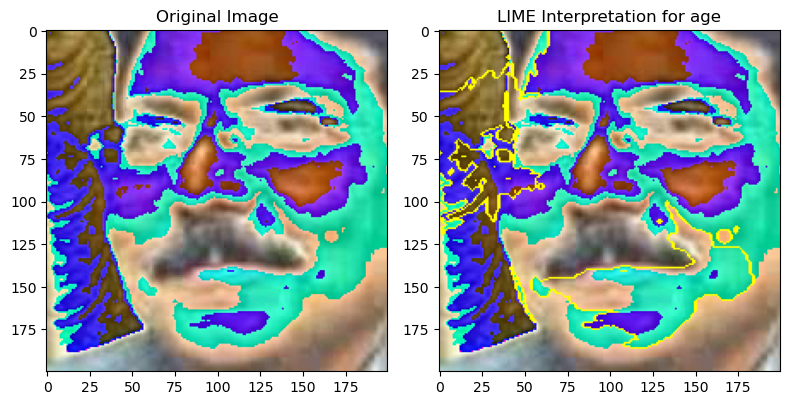

Interpreting model version v3 for worst performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

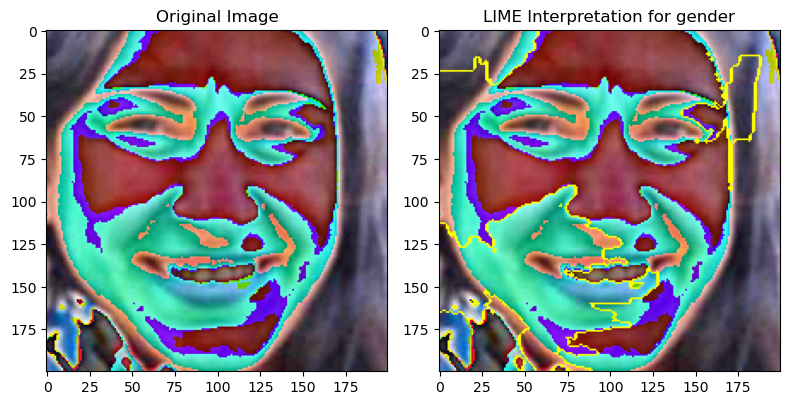

Interpreting model version v3 for worst performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

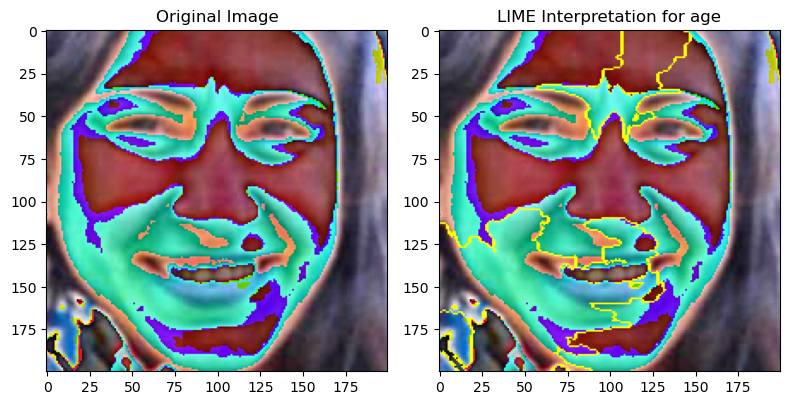

Interpreting model version v3 for worst performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

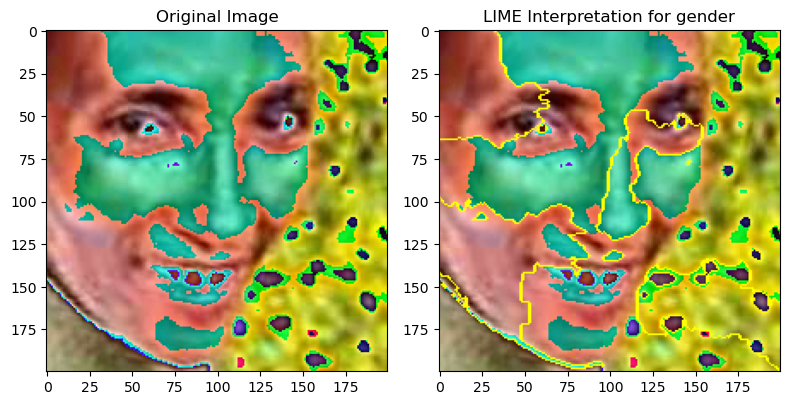

Interpreting model version v3 for worst performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

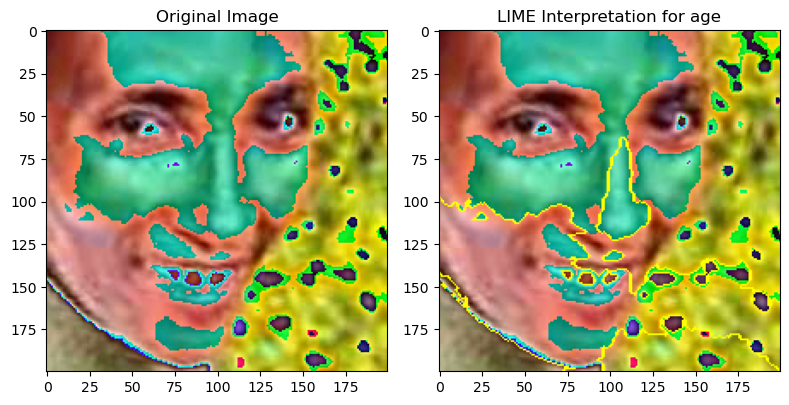

Interpreting model version v3 for worst performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

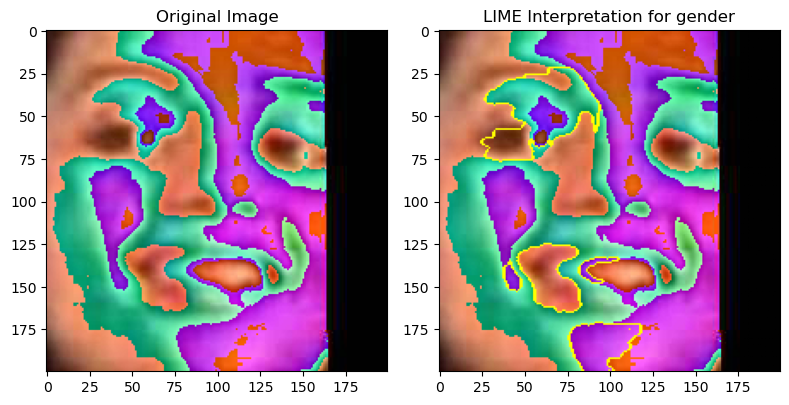

Interpreting model version v3 for worst performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

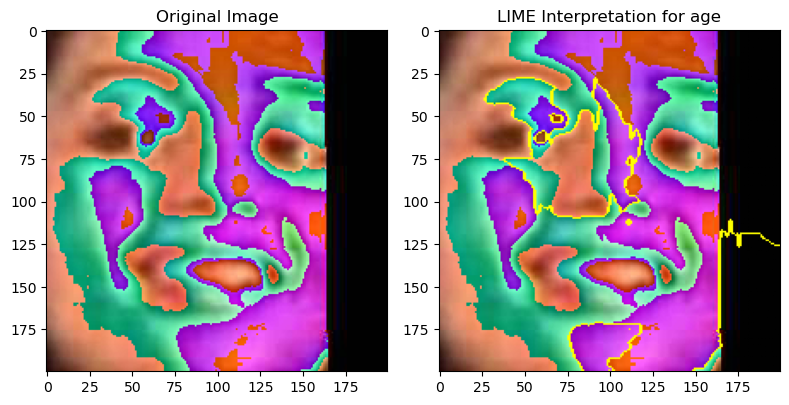

In [12]:
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    
    try:
        model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model from checkpoint: {e}")

    try:
        all_predictions, all_targets = evaluate_samples(model, test_loader)

        best_samples, worst_samples = get_best_and_worst_samples(all_predictions)

        model_wrapper = ModelWrapper(model)
        for i, (image, _, _) in enumerate(best_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255 
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

        for i, (image, _, _) in enumerate(worst_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255  
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

    except Exception as e:
        print(f"Error during model evaluation: {e}")

### Best Performing Samples
**Sample 1 (Baby)**
   - The model seems to focus on significant regions such as the eyes and mouth, which are relevant features for identifying both age and gender. 
   - Consistent identification of facial landmarks like the eyes and mouth contributes to accurate predictions, as these features provide strong cues for both age and gender classification.

**Sample 2 (Young Child Image)**
   - The LIME interpretation highlights facial features with clarity, focusing on the eyes, nose, and mouth.
   - Clear and distinguishable facial features make it easier for the model to differentiate the subject’s gender and predict the correct age group.

**Sample 3 (Adult Image with Distinct Features)**
   - The model performs well on samples where facial characteristics, such as nose shape and facial contours, are pronounced.
   - The consistency of focus on high-information areas like the forehead, eyes, and mouth contributes to accurate predictions.

### Worst Performing Samples
**Sample 1 (Unclear Facial Image)**
   - The LIME interpretation shows scattered regions with varying levels of attention. The model struggles to focus on facial landmarks.
   - The features such as the mouth and nose are not as clearly highlighted, indicating that the model may have had trouble distinguishing relevant details, possibly due to image blurriness or poor quality.

**Sample 2 (Face)**
   - The LIME output shows a less consistent focus, with significant attention placed on irrelevant areas, which indicates difficulty in locating important details of the face.

**Sample 3 (Partial Occlusion)**
   - The model struggles when there are occlusions, which might explain the poorer performance here.
   - The LIME interpretation focuses on regions that are not necessarily informative, such as blurred boundaries or non-facial areas, affecting both gender and age prediction.

### Reasons for Best/Worst Performance
- **Best Performance Factors:**
  - **Clear Facial Landmarks**: Images with well-defined facial features like eyes, nose, and mouth allowed the model to utilize important cues effectively.
  - **Good Lighting and Contrast**: Images with good lighting helped the model differentiate features easily, leading to more accurate predictions.
  - **Minimal Occlusion**: Faces without obstruction are easier to classify as all relevant features are visible to the model.

- **Worst Performance Factors:**
  - **Poor Image Quality**: Blurry or distorted images lead to the model having difficulty extracting meaningful features.
  - **Partial Occlusion**: When facial features are covered or obstructed, the model's attention may shift to irrelevant areas, reducing prediction accuracy.
  
These insights suggest that improving image quality, avoiding occlusions, and ensuring the presence of distinct facial features can enhance model performance for age and gender prediction tasks.

## Performance Per Gender

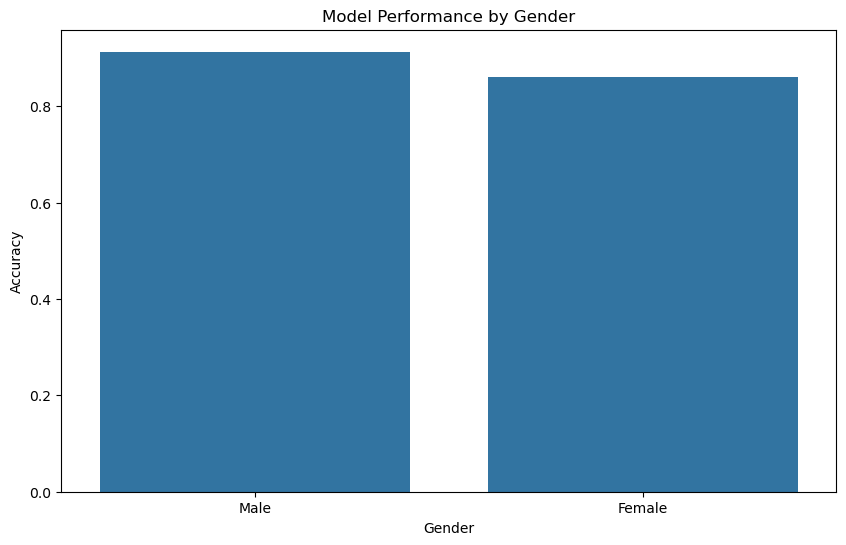

In [13]:
all_gender_targets = []
all_gender_preds = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        gender_targets = targets['gender']
        
        images = images.to(device)
        gender_targets = gender_targets.to(device)
        
        _, gender_preds = model(images)
        gender_preds = torch.argmax(gender_preds, dim=1)

        all_gender_targets.extend(gender_targets.cpu().numpy())
        all_gender_preds.extend(gender_preds.cpu().numpy())

all_gender_targets = np.array(all_gender_targets)
all_gender_preds = np.array(all_gender_preds)

gender_labels = ['Male', 'Female']
gender_results = {label: {'Correct': 0, 'Total': 0} for label in gender_labels}

for actual, pred in zip(all_gender_targets, all_gender_preds):
    gender_results[gender_labels[actual]]['Total'] += 1
    if actual == pred:
        gender_results[gender_labels[actual]]['Correct'] += 1

gender_performance = [gender_results[gender]['Correct'] / gender_results[gender]['Total'] for gender in gender_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_labels, y=gender_performance)
plt.xlabel('Gender')
plt.ylabel('Accuracy')
plt.title('Model Performance by Gender')
plt.show()

## Performance Per Age Group

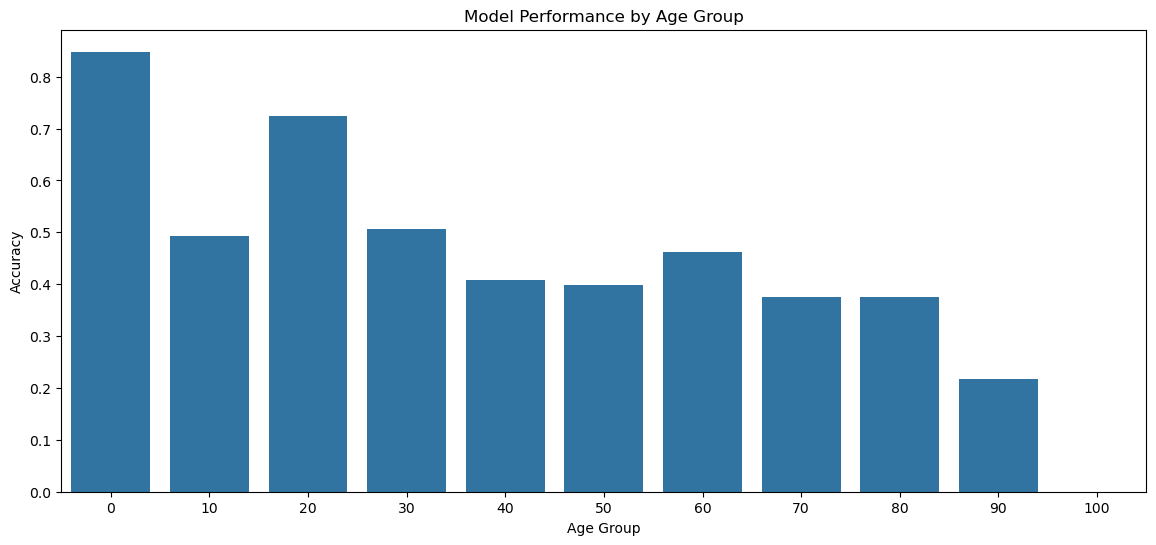

In [14]:
all_age_targets = []
all_age_preds = []

with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        age_targets = targets['age']

        images = images.to(device)
        age_targets = age_targets.to(device)

        age_preds, _ = model(images)

        all_age_targets.extend(age_targets.cpu().numpy())
        all_age_preds.extend(age_preds.cpu().numpy())

all_age_targets = np.array(all_age_targets)
all_age_preds = np.array(all_age_preds)

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_groups = pd.cut(all_age_targets, bins=age_bins)
age_accuracy = []

for age_bin in age_bins[:-1]:
    mask = (all_age_targets >= age_bin) & (all_age_targets < age_bin + 10)
    correct_predictions = np.sum((all_age_preds[mask] >= age_bin) & (all_age_preds[mask] < age_bin + 10))
    accuracy = correct_predictions / np.sum(mask) if np.sum(mask) > 0 else 0
    age_accuracy.append(accuracy)

plt.figure(figsize=(14, 6))
sns.barplot(x=age_bins[:-1], y=age_accuracy)
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.title('Model Performance by Age Group')
plt.show()

### Model Performance by Gender

- The model shows a similar level of accuracy for both genders, which suggests that it is relatively unbiased towards predicting either male or female. This is an indication that the model has learned balanced features for both gender categories, possibly due to a well-balanced training dataset in terms of gender.

### Model Performance by Age Group

- There is a noticeable drop in performance as the age group increases, especially after 30 years. This could indicate several factors:
     - **Data Imbalance**: There are fewer training samples for older age groups, leading to poorer generalization.
     - **Greater Variability**: Facial features become more variable with age, such as wrinkles, sagging, and changes in bone structure, which can make accurate age prediction challenging for the model.
     - **Feature Ambiguity**: For older individuals, some features might be less distinctive, leading the model to focus on incorrect or misleading cues.

In summary, the model's best performance seems to come from focusing on the key facial features with good quality, clear images. The worst-performing predictions are often due to poor focus, irrelevant regions, and complex visual artifacts, as well as the inherent challenges with certain demographics (like older age groups). Improvements might be gained by adding more samples of older individuals or focusing on enhancing feature extraction for these age groups.